In [2]:
import pandas as pd
pizza = {'diameter' :[6, 8, 10, 14, 18],
         'harga': [7, 9, 13, 17.5, 18]}
pizza_df= pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


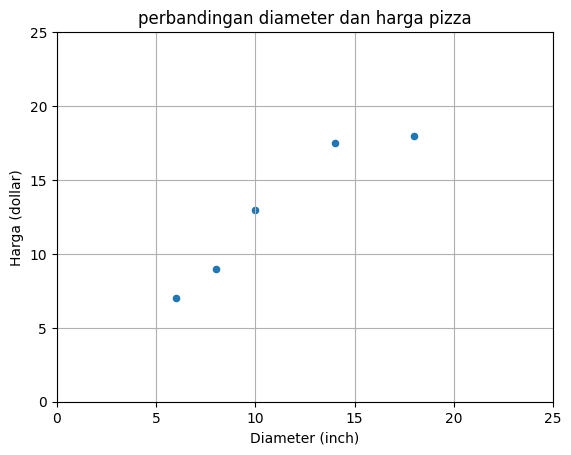

In [5]:
import matplotlib.pyplot as plt
pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('perbandingan diameter dan harga pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

In [7]:
import numpy as np
X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [8]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [9]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
X_vis = np.array([0, 25]).reshape(-1,1)
y_vis = model.predict(X_vis)

<function matplotlib.pyplot.show(close=None, block=None)>

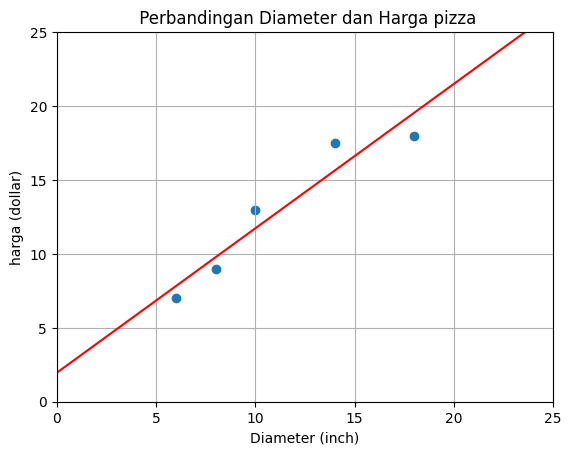

In [15]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title(' Perbandingan Diameter dan Harga pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show

In [16]:
print (f'imtercept: {model.intercept_}')
print (f'slope: {model.coef_}')

imtercept: 1.965517241379315
slope: [0.9762931]


In [18]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


In [21]:
variance_x = np.var(X.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 23.2


In [22]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [23]:
covariance_xy = np.cov(X.flatten(), y)[0][1]
print(f'covariance: {covariance_xy}')

covariance: 22.650000000000002


In [24]:
slope = covariance_xy/ variance_x
print (f'slope: {slope}')

slope: 0.976293103448276


In [27]:
intercept = np.mean(y) - slope + np.mean(X)
print(f'intercept:{intercept}')

intercept:23.123706896551724


In [28]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [29]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [30]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} prediksi harga: {hrg}')

Diameter: [12] prediksi harga: 13.681034482758621
Diameter: [20] prediksi harga: 21.491379310344826
Diameter: [23] prediksi harga: 24.42025862068965


In [37]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r_squared =r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


In [42]:
ss_res =sum([(y_i - model.predict(x_i.reshape(-1,1))[0])**2
             for x_i, y_i in zip(X_test, y_test)])
print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


In [45]:
mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])
print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


In [46]:
r_squared = 1 - (ss_res / ss_tot)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553


In [18]:
import pandas as pd 
pizza = {'diameter': [6, 8, 10, 14, 18],
         'n_topping': [2, 1, 0, 2, 0],
         'harga': [7, 9, 13, 17.5, 18]}
train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


In [19]:
pizza = {'diameter': [8, 9, 11, 16, 12],
         'n_topping': [2, 0, 2, 2, 0],
         'harga': [11, 8.5, 15, 18, 11]}
test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


In [20]:
import numpy as np

X_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train: [ 7.   9.  13.  17.5 18. ]


In [21]:
X_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f'X_test:\n{X_test}\n')
print(f'y_test: {y_test}')

X_test:
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test: [11.   8.5 15.  18.  11. ]


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'r_squared: {r2_score(y_test, y_pred)}')

r_squared: 0.7701677731318468


In [27]:
X_train = np.array(train_pizza_df['diameter']).reshape(-1, 1)
y_train = np.array(train_pizza_df['harga'])

print(f'X_train:\n{X_train}\n')
print(f'y_train:{y_train}')

X_train:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train:[ 7.   9.  13.  17.5 18. ]


In [28]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]



In [29]:
model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

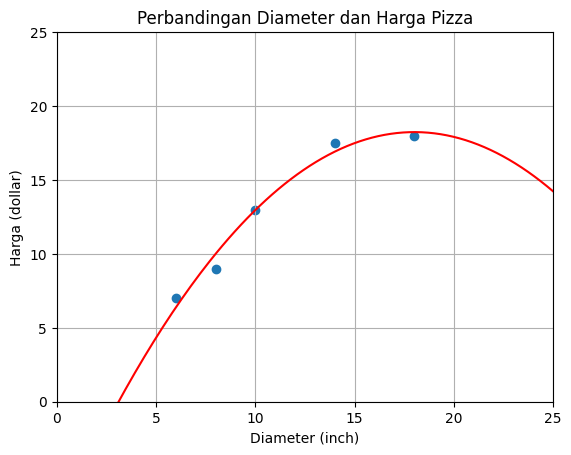

In [30]:
import matplotlib.pyplot as plt
import numpy as np 

X_vis = np.linspace(0, 25, 160).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)  
y_vis_quadratic = model.predict(X_vis_quadratic)  

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

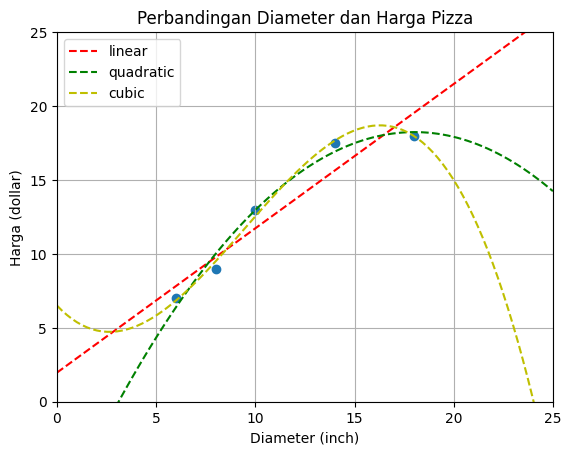

In [33]:
# Training Set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.legend()
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


In [41]:
import pandas as pd
df = pd.read_csv('C:/Users/Reival/dataset/SMSSpamCollection',
                 sep='\t',
                 header=None,
                 names=['label', 'sms'])
print(df.head())

  label                                                sms
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [42]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import LabelBinarizer

X = df['sms'].values
y = df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_ 

array(['ham', 'spam'], dtype='<U4')

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.25, 
                                                 random_state=0)
print(X_train, '\n')
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 32656 stored elements and shape (4179, 7287)>
  Coords	Values
  (0, 2997)	0.23173982975834367
  (0, 3007)	0.21421364306658514
  (0, 5123)	0.308974289326673
  (0, 4453)	0.2297719954323795
  (0, 3926)	0.3126721340000456
  (0, 2554)	0.3825278811525034
  (0, 6739)	0.3546359942830148
  (0, 900)	0.4114867709157148
  (0, 2006)	0.2898082580285881
  (0, 6903)	0.3591386422223876
  (1, 5642)	0.24344998442301355
  (1, 799)	0.25048918791028574
  (1, 5441)	0.5009783758205715
  (1, 6472)	0.24039776602646504
  (1, 6013)	0.20089911182610476
  (1, 216)	0.28902673040368515
  (1, 4677)	0.24039776602646504
  (1, 5394)	0.16464655071448758
  (1, 6131)	0.16142609035094446
  (1, 532)	0.20186022353306565
  (1, 4358)	0.17341410292348694
  (1, 5301)	0.2711077935907125
  (1, 2003)	0.2711077935907125
  (1, 1548)	0.18167737976542422
  (1, 36)	0.28902673040368515
  :	:
  (4176, 6792)	0.1407604617250961
  (4176, 6693)	0.16491299289150899
  (4176, 6684)	0.22

In [54]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

for pred, sms in zip(y_pred[:5], X_test[:5]):
    print(f'PRED: {pred} - SMS: {sms}\n')

PRED: 0 - SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@

PRED: 0 - SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.

PRED: 0 - SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

PRED: 0 - SMS: Sir Goodmorning, Once free call me.

PRED: 0 - SMS: All will come alive.better correct any good looking figure there itself..



In [55]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1207,    1],
       [  47,  138]], dtype=int64)

In [56]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')


TN: 1207
FP: 1
FN: 47
TP: 138


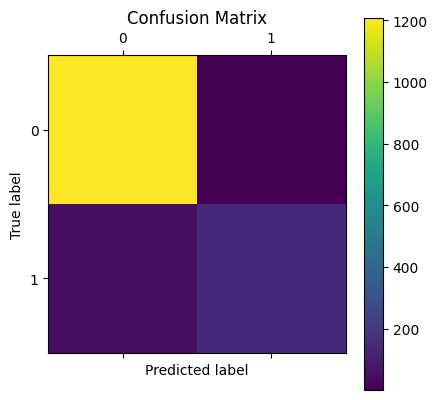

In [57]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show() 

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9655419956927495

In [60]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9928057553956835

In [61]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.745945945945946

In [62]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8518518518518519

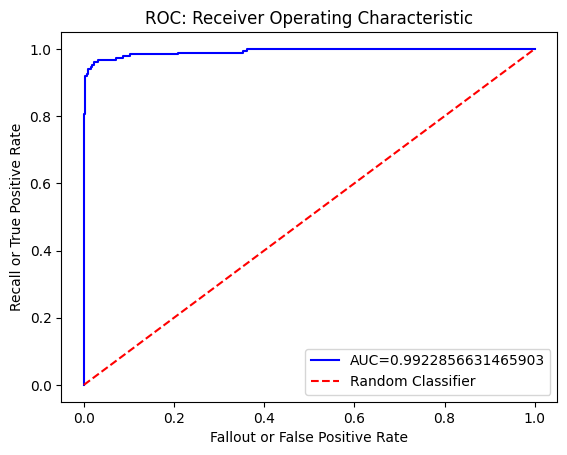

In [64]:
from sklearn.metrics import roc_curve, auc

prob_estimates = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, prob_estimates)
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()